# Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Building a simple CNN model

#### **Task 1: Reading the data**

Importing all the important libraries

In [1]:
# Importing the required libraries
import pathlib
import os
import PIL

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D , Dropout, MaxPool2D, AveragePooling2D, Rescaling

In [2]:
tf.random.set_seed(123)

You are expected to load the data in the Colab environment by mounting the Google Drive. This will allow you to access the files from Google drive through Colab. 

Steps:
1. Upload the dataset in your Google Drive in a separate folder. Avoid spaces in the name of the folder or the zip file.
2. Mount the Google Drive using the code given below.
3. Unzip the file to access images.
4. Check the path for the datasets - train and test.


Note: The code is commented for you to learn and then make edits to execute the command.

In [3]:
## If you are using the data by mounting the google drive, use the following:
from google.colab import drive
drive.mount('/content/gdrive')

## Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [4]:
# Your GDrive Directory
# !ls /content/gdrive/MyDrive

In [5]:
# Unzipping the files
# To do: Update the folder name and file name
!unzip /content/gdrive/My\ Drive/CNN_assignment.zip

Archive:  /content/gdrive/My Drive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflatin

Check the path mentioned in the output: `Skin cancer ISIC The International Skin Imaging Collaboration`

Provide the path for train and test images using pathlib library.

In [6]:
# Defining the path for train and test images
## To do: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

Check whether the data has been extracted successfully.

In [7]:
# Train and test images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)

Train images:	 2239
Test images:	 118


#### **Task 2: Loading the images using keras.preprocessing**

The images are still not loaded in the Colab environment. We have extracted them from the zip file. Now, you are expected to load them in the Colab notebook using the `preprocessing` attribute.

Let's load these images off disk using the helpful image_dataset_from_directory utility. You can refer to the following [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) to know more about the function. You can even refer to the additional notebooks on the page to check how the variables are defined.



Defining the parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Divide the training set into 2 parts: 
*   80% for training 
*   20% for validation



In [9]:
## Write your code for train dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Write your code for validation dataset here.
## Note: Use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note: Make sure you resize your images to the size: img_height*img_width, while specifying the variable

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the 'class_names' attribute associated with the training and validation datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Task 3: Visualize the data**

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

Write the code to visualize one instance of all the nine classes present in the dataset

In [12]:
import re
uniques = []
uniques.append([x for x in list(data_dir_train.glob('*/*.jpg')) if re.compile(class_names[0]).search(str(x))][0])
uniques.append([x for x in list(data_dir_train.glob('*/*.jpg')) if re.compile(class_names[1]).search(str(x))][0])
uniques.append([x for x in list(data_dir_train.glob('*/*.jpg')) if re.compile(class_names[2]).search(str(x))][0])
uniques.append([x for x in list(data_dir_train.glob('*/*.jpg')) if re.compile(class_names[3]).search(str(x))][0])
uniques.append([x for x in list(data_dir_train.glob('*/*.jpg')) if re.compile(class_names[4]).search(str(x))][0])
uniques.append([x for x in list(data_dir_train.glob('*/*.jpg')) if re.compile(class_names[5]).search(str(x))][0])
uniques.append([x for x in list(data_dir_train.glob('*/*.jpg')) if re.compile(class_names[6]).search(str(x))][0])
uniques.append([x for x in list(data_dir_train.glob('*/*.jpg')) if re.compile(class_names[7]).search(str(x))][0])
uniques.append([x for x in list(data_dir_train.glob('*/*.jpg')) if re.compile(class_names[8]).search(str(x))][0])

uniques

[PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026149.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0025019.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0031271.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010784.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0026149.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0028628.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/ISIC_0011118.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0027178.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging

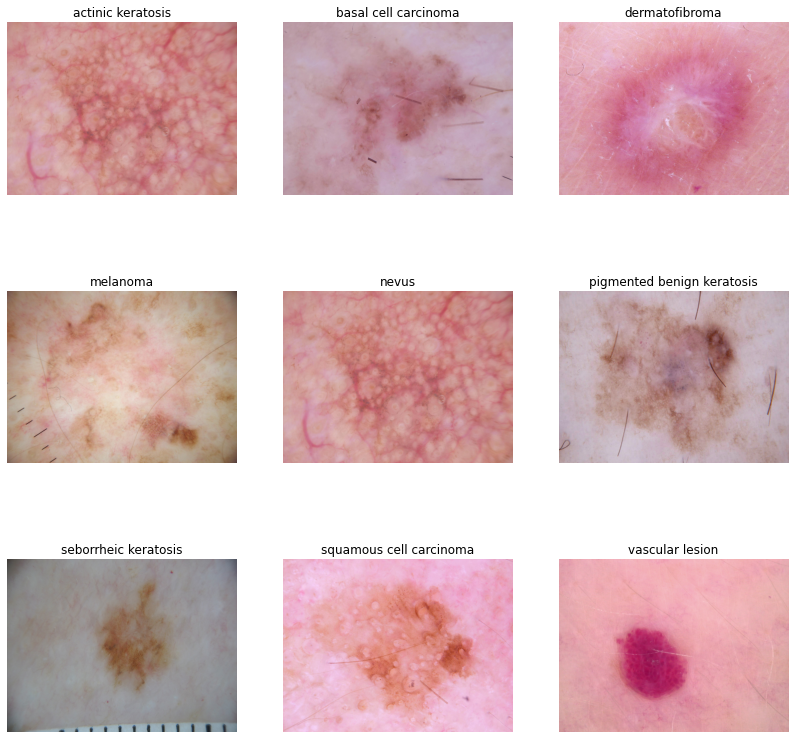

In [13]:
### Your code goes here; you can use either training or validation data to visualize the images.
# 1 image from each class in dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))
# labels_plotted = []
for i in range(9):
# if class_names[labels[i]] not in labels_plotted:
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(plt.imread(str(uniques[i])).astype(float)/255.)    
  plt.title(str(uniques[i]).split('/')[2])
  # labels_plotted.append(class_names[labels[i]])
  # print(labels_plotted)
  plt.axis("off")

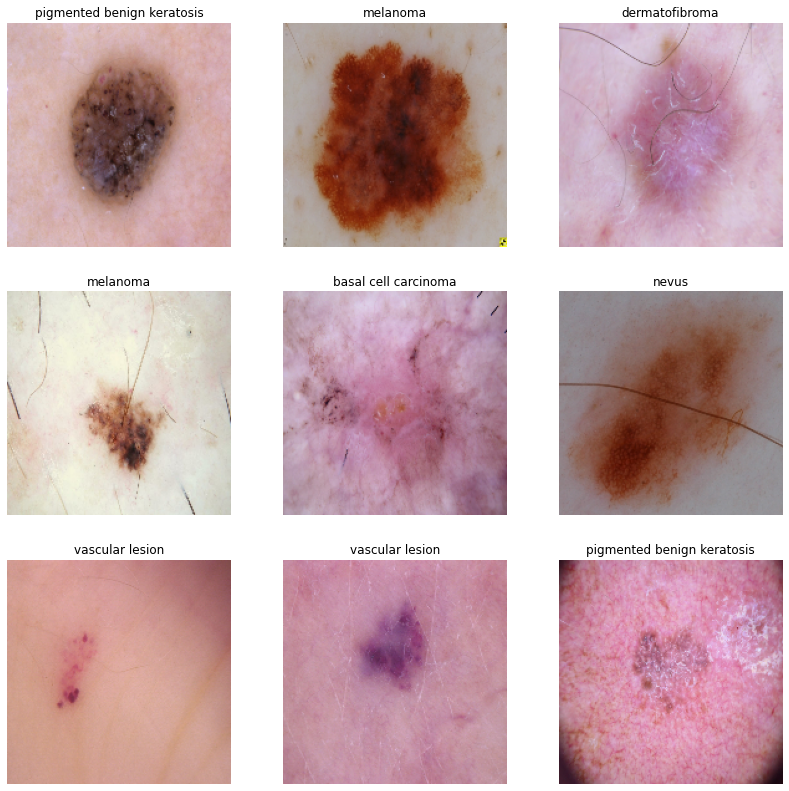

In [14]:
# 9 Random images from a single batch in dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))
# labels_plotted = []
for images, labels in train_ds.take(1):
  for i in range(9):
  # if class_names[labels[i]] not in labels_plotted:
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    # labels_plotted.append(class_names[labels[i]])
    # print(labels_plotted)
    plt.axis("off")

### Your code goes here; you can use either training or validation data to visualize the images.

#### Configure the dataset for performance
Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Task 4: Create the model**
Create a CNN model, which can accurately detect 9 classes present in the dataset. 


*   Note: The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`. Use `layers.experimental.preprocessing.Rescaling` for this purpose.

In [16]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape = (180,180,3))
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [17]:
# from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D , Dropout, MaxPool2D, AveragePooling2D, Rescaling
# from tensorflow.keras.callbacks import ReduceLROnPlateau

In [18]:
### Your code goes here
input_shape = (180,180,3)
num_classes = 9
batch_size = 32

tf.random.set_seed(123)

model = Sequential()
# model.add(Rescaling(1./255, input_shape = input_shape))
model.add(Conv2D(8, kernel_size=(3, 3),padding = 'Same',input_shape=input_shape,activation= 'relu', kernel_initializer='glorot_uniform'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3),padding = 'Same', activation ='relu', kernel_initializer = 'glorot_uniform'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same', activation ='relu', kernel_initializer = 'glorot_uniform'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='normal'))
# model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#### **Question**: 
Explain the following elements associated with the problem:
1.   Selection of stride value (Reason for using a high/low value)
2.   Padding strategy used (Same/Valid)

**I used "same" padding which has a deafult stride of "1" and the reason for this is that same padding will help retain the size of image. The general rule is to use stride=1 in usual convolutions and preserve the spatial size with padding, and use stride=2 when you want to downsample the image. But i'm alternatively using a Max Pooling layer which help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the size and number of parameters to learn and provides basic translation invariance to the internal representation.**

#### **Task 5: Compile the model**
Choose an appropirate optimiser and loss function for model training.

In [19]:
### Choose an appropirate optimiser and loss function
model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )

In [20]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        2336      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 64)       0

#### Train the model

In [21]:
# The model needs to be trained for 20 epochs
tf.random.set_seed(123)

epochs = 20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs,
  batch_size=batch_size
)

Epoch 1/20
56/56 [==============================] - 24s 73ms/step - loss: 2.1916 - accuracy: 0.1987 - val_loss: 85.7216 - val_accuracy: 0.2796
Epoch 2/20
56/56 [==============================] - 2s 34ms/step - loss: 1.8192 - accuracy: 0.3493 - val_loss: 185.9898 - val_accuracy: 0.3557
Epoch 3/20
56/56 [==============================] - 2s 34ms/step - loss: 1.5452 - accuracy: 0.4581 - val_loss: 128.6454 - val_accuracy: 0.3982
Epoch 4/20
56/56 [==============================] - 2s 29ms/step - loss: 1.4138 - accuracy: 0.5073 - val_loss: 213.2963 - val_accuracy: 0.2461
Epoch 5/20
56/56 [==============================] - 1s 26ms/step - loss: 1.3169 - accuracy: 0.5307 - val_loss: 137.9920 - val_accuracy: 0.3244
Epoch 6/20
56/56 [==============================] - 1s 26ms/step - loss: 1.2484 - accuracy: 0.5608 - val_loss: 188.5628 - val_accuracy: 0.2998
Epoch 7/20
56/56 [==============================] - 1s 26ms/step - loss: 1.1489 - accuracy: 0.5893 - val_loss: 203.1869 - val_accuracy: 0.3266

#### Visualizing training results

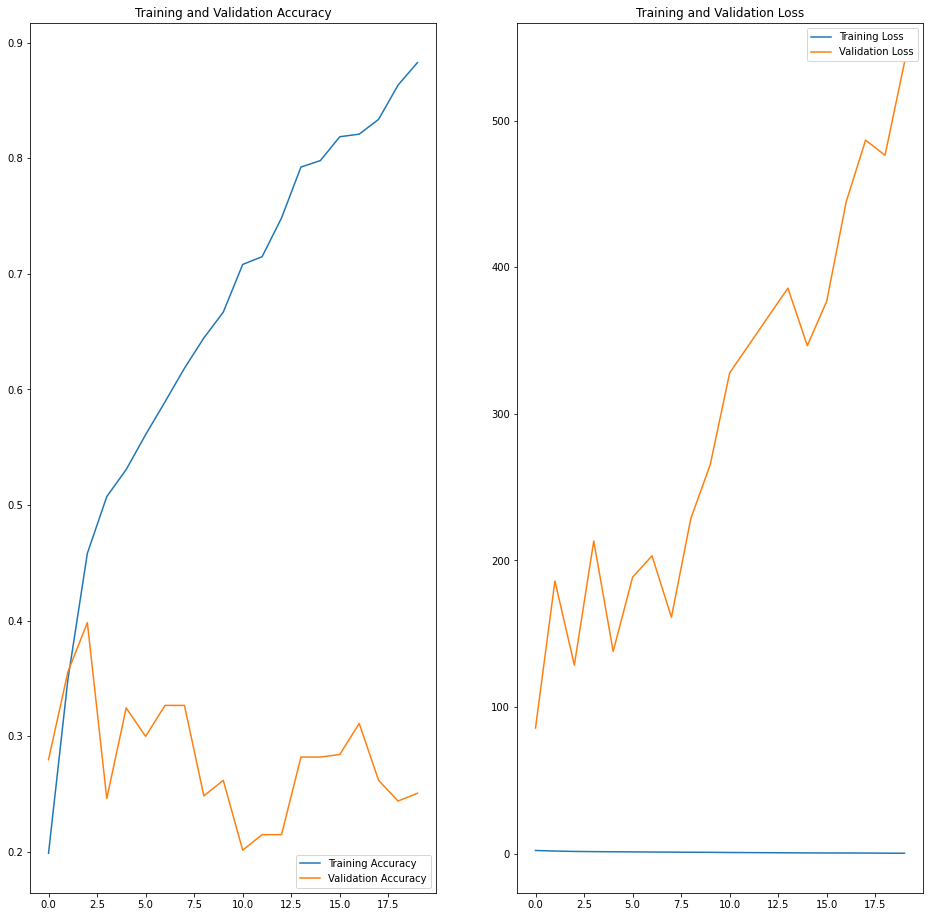

In [22]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit

**This is a clear case of overfitting since the model is achieveing a very high accuracy of above 85% on training data but achieves a poor accuracy of below 30% on the validation dataset.** We will see how we can tackle this problem using data augemntation and class rebalancing below and try to reduce the gap between training and validation accuracy using data augmentation

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [23]:
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
    layers.experimental.preprocessing.RandomFlip("vertical", input_shape=(img_height, img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.15),
    layers.experimental.preprocessing.RandomZoom(0.15),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times

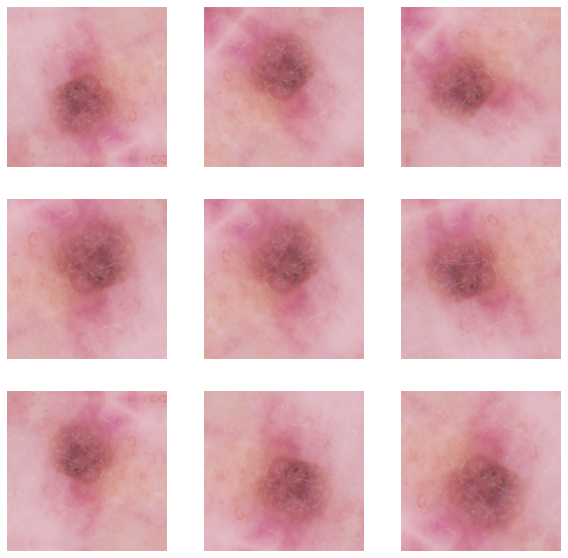

In [24]:
# Visualizing how the augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy())
    plt.axis("off")

#### **Task 6: Create, compile and train the model**

Model Definition

In [25]:
### Your code goes here
input_shape = (180,180,3)
num_classes = 9
batch_size = 32

tf.random.set_seed(123)

model2 = Sequential()
# model2.add(Rescaling(1./255, input_shape = input_shape))
model2.add(data_augmentation)
model2.add(Conv2D(8, kernel_size=(3, 3),padding = 'Same',input_shape=input_shape,activation= 'relu', kernel_initializer='glorot_uniform'))
model2.add(MaxPool2D(pool_size = (2, 2)))

model2.add(Conv2D(32, kernel_size=(3, 3),padding = 'Same', activation ='relu', kernel_initializer = 'glorot_uniform'))
model2.add(MaxPool2D(pool_size = (2, 2)))

model2.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same', activation ='relu', kernel_initializer = 'glorot_uniform'))
model2.add(MaxPool2D(pool_size = (2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='normal'))
# model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))

Compiling the model

In [26]:
## Your code goes here
model2.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        2336      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

Training the model

In [27]:
# Note: Train your model for 20 epochs
## Your code goes here
tf.random.set_seed(123)

epochs = 20

history2 = model2.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs,
  batch_size=batch_size
)

Epoch 1/20
56/56 [==============================] - 3s 33ms/step - loss: 2.1777 - accuracy: 0.2093 - val_loss: 92.3227 - val_accuracy: 0.2595
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.9151 - accuracy: 0.3131 - val_loss: 57.8576 - val_accuracy: 0.3826
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 1.7167 - accuracy: 0.3850 - val_loss: 242.1028 - val_accuracy: 0.1678
Epoch 4/20
56/56 [==============================] - 2s 30ms/step - loss: 1.5772 - accuracy: 0.4375 - val_loss: 126.1821 - val_accuracy: 0.3579
Epoch 5/20
56/56 [==============================] - 2s 29ms/step - loss: 1.5352 - accuracy: 0.4593 - val_loss: 197.6514 - val_accuracy: 0.2349
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4553 - accuracy: 0.4955 - val_loss: 185.1618 - val_accuracy: 0.3579
Epoch 7/20
56/56 [==============================] - 2s 29ms/step - loss: 1.3890 - accuracy: 0.4983 - val_loss: 173.2822 - val_accuracy: 0.2931
E

#### Visualizing the results

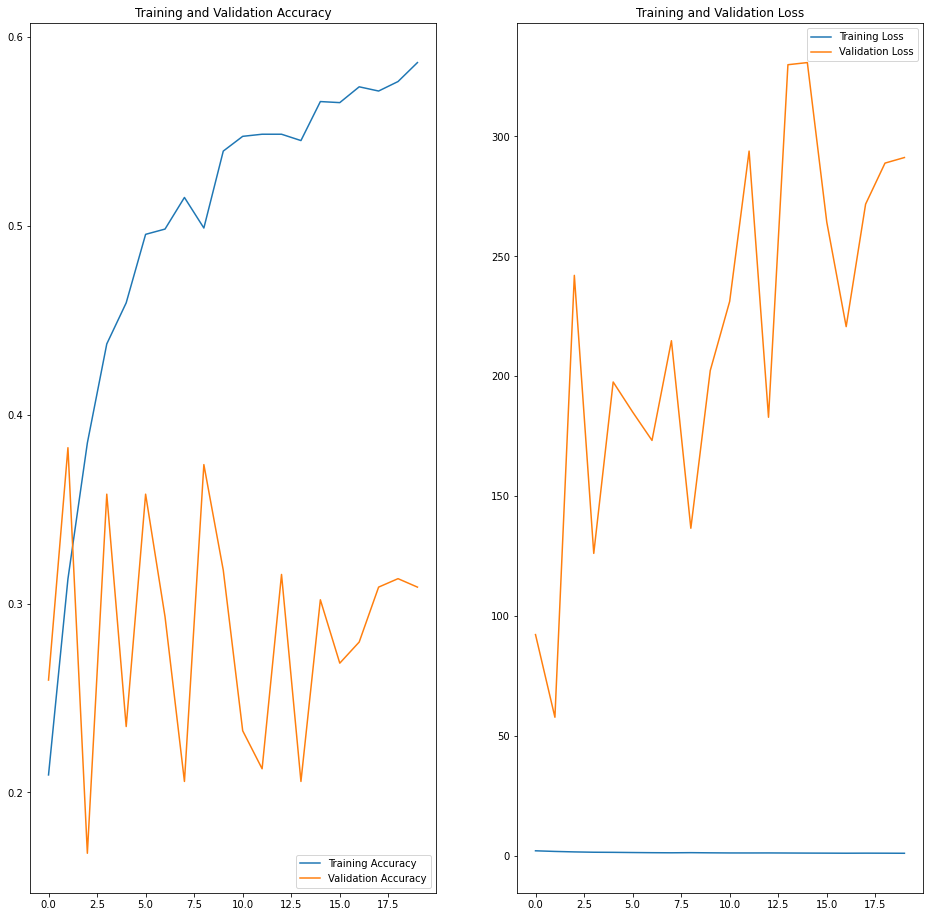

In [28]:
# Graphs
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**The model was overfitting previously but after adding a data augmentation layer the overiftting problem is partly resolved (the gap between train-validation accuracy is reduced by 20% but the gap should ideally be 5-10% different). But model has an accuracy of around 55-60% which is not acceptable hence we will investigate why is this so and help the model learn better and acheive an acceptable accuracy of above 80% using class rebalancing (adding 500 images to each class) and training for more epochs (30)**

## Distribution in the dataset

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<br>

#### **Task 7: Find the distribution of classes in the training dataset.**

In [29]:
## Your code goes here.
labels = []
for im,label in train_ds:
  labels.append(label.numpy().tolist())
for im,label in val_ds:
  labels.append(label.numpy().tolist())

In [30]:
import pandas as pd
labels = sum(labels,[])
pd.Series(labels).value_counts()

5    462
3    438
1    376
4    357
7    181
8    139
0    114
2     95
6     77
dtype: int64

In [31]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026149.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027829.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027447.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029900.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029460.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0028393.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029840.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0030730.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026457.jpg',
 'Skin cancer ISIC The International 

In [32]:
lesion_list = [x.split('/')[2] for x in path_list]
lesion_list

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [33]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [34]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [35]:
original_df

Path              Label
0     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
1     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
2     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
3     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
4     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
...                                                 ...                ...
2234  Skin cancer ISIC The International Skin Imagin...           melanoma
2235  Skin cancer ISIC The International Skin Imagin...           melanoma
2236  Skin cancer ISIC The International Skin Imagin...           melanoma
2237  Skin cancer ISIC The International Skin Imagin...           melanoma
2238  Skin cancer ISIC The International Skin Imagin...           melanoma

[2239 rows x 2 columns]

In [36]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Questions:**  
 - Which class has the least number of samples?
 - Which classes dominate the data in terms proportionate number of samples?


Answers :

1.   **Label 6: seborrheic keratosis has the least number of samples**
2.   **Label 5: pigmented benign keratosis dominate the data in terms proportionate number of samples** 



#### **Task 8: Rectifying the class imbalance**
You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [37]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [38]:
# Provide the path for the training dataset
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)
    ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAF0DEEEFD0>: 100%|██████████| 500/500 [00:19<00:00, 26.22 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAF0DEFD590>: 100%|██████████| 500/500 [00:19<00:00, 25.63 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAF0E318690>: 100%|██████████| 500/500 [00:20<00:00, 24.72 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FAF0D9C1590>: 100%|██████████| 500/500 [01:43<00:00,  4.83 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FAF0DC33E10>: 100%|██████████| 500/500 [01:28<00:00,  5.63 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAF0D9ECE90>: 100%|██████████| 500/500 [00:16<00:00, 30.63 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FAF0DF2CD90>: 100%|██████████| 500/500 [00:39<00:00, 12.62 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FAF0DEEDE90>: 100%|██████████| 500/500 [00:16<00:00, 29.76 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB0365712D0>: 100%|██████████| 500/500 [00:21<00:00, 23.67 Samples/s]


*Augmentor* has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

In [39]:
# Count of images under each class after addition
image_count_train = len(list(data_dir_train.glob('*/*.jpg'))) + len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

6739


Lets see the distribution of augmented data after adding new images to the original training data.

In [40]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027536.jpg_87b2468e-a983-4cb0-a5c5-c651da074161.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026212.jpg_b924271a-661a-4afd-84b2-5481f0de3602.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029659.jpg_7342fb60-d559-452b-ac32-d78bceb68068.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029041.jpg_a122bb8f-a1c1-46b3-998a-da97a180615e.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028854.jpg_8bcb7312-dbee-4aa6-896d-cc264eab556d.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ou

In [41]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [42]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [43]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

# new_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [44]:
new_df

Path              Label
0     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
1     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
2     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
3     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
4     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
...                                                 ...                ...
4495  Skin cancer ISIC The International Skin Imagin...           melanoma
4496  Skin cancer ISIC The International Skin Imagin...           melanoma
4497  Skin cancer ISIC The International Skin Imagin...           melanoma
4498  Skin cancer ISIC The International Skin Imagin...           melanoma
4499  Skin cancer ISIC The International Skin Imagin...           melanoma

[6739 rows x 2 columns]

In [45]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### **Task 9: Repeating the steps for balanced augmented data**

In [46]:
batch_size = 32
img_height = 180
img_width = 180

**Create a training dataset**

In [47]:
# Provide the path here
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

# Provide the subset value here
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Choose the correct parameter value, so that only training data is refered to,
  image_size = (img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Create a validation dataset**

In [48]:
# Provide the subset value here
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


**Create your model (make sure to include normalization)**

In [49]:
# normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
# train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [50]:
### Your code goes here
input_shape = (180,180,3)
num_classes = 9
batch_size = 32

tf.random.set_seed(123)

model3 = Sequential()
model3.add(Rescaling(1./255, input_shape = input_shape))
model3.add(Conv2D(8, kernel_size=(3, 3),padding = 'Same',input_shape=input_shape,activation= 'relu', kernel_initializer='glorot_uniform'))
model3.add(MaxPool2D(pool_size = (2, 2)))
model3.add(Dropout(0.05))

model3.add(Conv2D(32, kernel_size=(3, 3),padding = 'Same', activation ='relu', kernel_initializer = 'glorot_uniform'))
model3.add(MaxPool2D(pool_size = (2, 2)))
model3.add(Dropout(0.1))

model3.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same', activation ='relu', kernel_initializer = 'glorot_uniform'))
model3.add(MaxPool2D(pool_size = (2, 2)))
model3.add(Dropout(0.15))

model3.add(Flatten())
model3.add(Dropout(0.2))
model3.add(Dense(128, activation='relu', kernel_initializer='normal'))
model3.add(Dropout(0.25))
model3.add(Dense(num_classes, activation='softmax'))

**Compile your model (Choose optimizer and loss function appropriately)**

In [51]:
## Your code goes here
model3.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 8)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 8)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        2336      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

**Train your model**

In [52]:
# Note: Train your model for 30 epochs
## Your code goes here
tf.random.set_seed(123)

epochs = 30

history3 = model3.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs,
  batch_size=batch_size
)

Epoch 1/30
169/169 [==============================] - 37s 207ms/step - loss: 2.1895 - accuracy: 0.1719 - val_loss: 1.8195 - val_accuracy: 0.2687
Epoch 2/30
169/169 [==============================] - 24s 137ms/step - loss: 1.6995 - accuracy: 0.3459 - val_loss: 1.5247 - val_accuracy: 0.4284
Epoch 3/30
169/169 [==============================] - 24s 138ms/step - loss: 1.4276 - accuracy: 0.4657 - val_loss: 1.2663 - val_accuracy: 0.5442
Epoch 4/30
169/169 [==============================] - 24s 138ms/step - loss: 1.2638 - accuracy: 0.5326 - val_loss: 1.3721 - val_accuracy: 0.5130
Epoch 5/30
169/169 [==============================] - 24s 138ms/step - loss: 1.1424 - accuracy: 0.5794 - val_loss: 1.0674 - val_accuracy: 0.6169
Epoch 6/30
169/169 [==============================] - 24s 138ms/step - loss: 1.0135 - accuracy: 0.6252 - val_loss: 0.9793 - val_accuracy: 0.6444
Epoch 7/30
169/169 [==============================] - 24s 137ms/step - loss: 0.8985 - accuracy: 0.6630 - val_loss: 1.1246 - val_ac

**Visualize the model results**

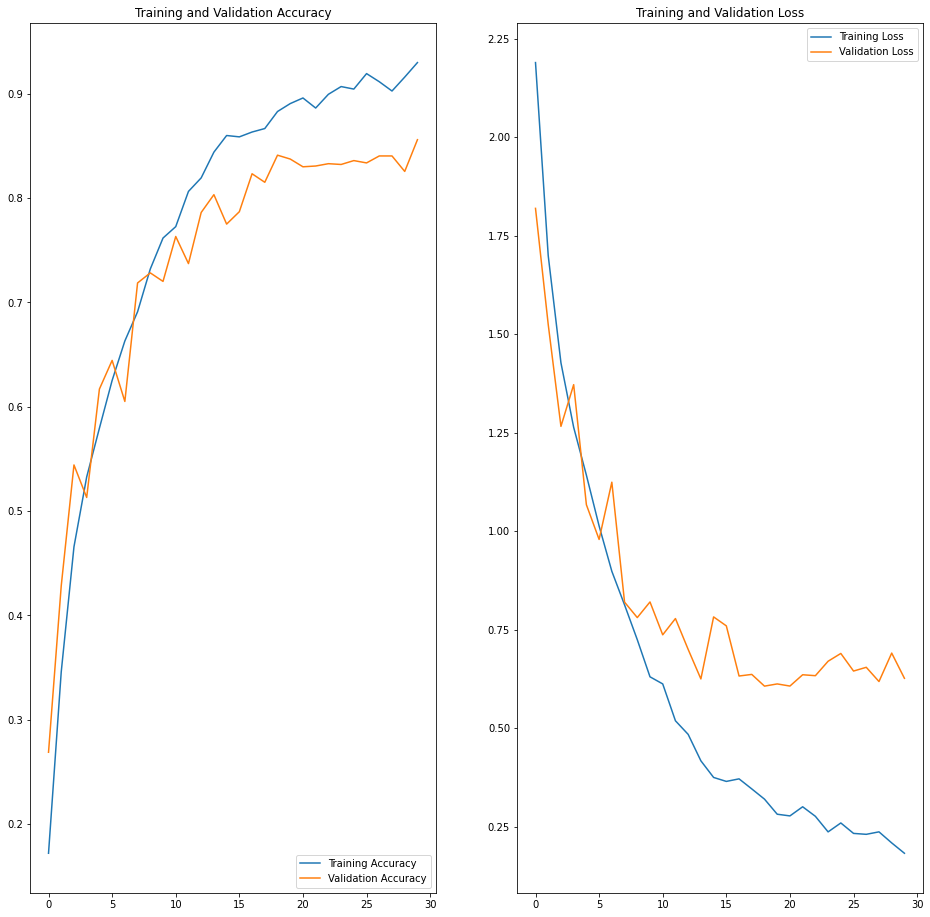

In [53]:
# Graphs
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Task 10: Analyzing the results** 


#### **Question:**
- Did you get rid of underfitting/overfitting from the model? 
- Did class rebalance help in the process?


**Yes, I successfully prevented the model from overfitting** (thus helping it generalise well on unseen data) **by using class rebalancing** (adding 500 images to each class) to tackle overfitting. This model is able to achieve 85-95% accuracy on training data and 80-90% accuracy on validation data which is a good classification CNN model.